In [1]:
import numpy as np
import pandas as pd
import astropy.io.fits as pyfits
import gvar as gv
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
PATH_CAT_CROSSMATCH = '../Data/COSMOS/Catalog/CrossMatch/'
PATH_DATA = '../Data/COSMOS/Catalog/CrossMatch/diffR_450um_1d4GHzXS/'
PATH_FIGURE         = '../Figures/'
fn = 'cosmos_match_450um_Gao_Lim_r2.0_1d4GHzXS'

In [3]:
def interval_arr(in_arr):
    return in_arr[1:]-in_arr[:-1]

def avg_arr(in_arr):
    return (in_arr[1:]+in_arr[:-1])/2

In [290]:

# df

234

In [6]:
def plot_diff_radius(fig, axs, all_source_num, radius_arr, best_match_num_arr, all_match_num_arr):            
            
    xmin = 0
    xmax = 8
    x_line = np.linspace(xmin,xmax,20)
    radius_ref = 4
    area_arr = np.pi*radius_arr**2


    axs[0, 0].plot(radius_arr, best_match_num_arr, 'o-', label='best match')
    axs[0, 0].plot(radius_arr, all_match_num_arr, 'o-', label='all match')
    # axs[0, 0].plot(radius_arr, area_arr)
    axs[0, 0].set_ylabel('matched num (#)')
#     ymax = max(all_match_num_arr) 
#     y_line = np.linspace(0,ymax,20)
    ymin = min(best_match_num_arr)
    ymax = max(all_match_num_arr) 
    y_line = np.linspace(ymin,ymax,20)
    
    axs[0, 0].plot(y_line*0+radius_ref, y_line, '-', color='lightskyblue')

    axs[0, 1].plot(radius_arr, best_match_num_arr*100/all_source_num, 'o-', label='best match (SNR>%.1f)'%(SNR_thld))
    axs[0, 1].plot(radius_arr, all_match_num_arr*100/all_source_num, 'o-', label='all match (SNR>%.1f)'%(SNR_thld))
    axs[0, 1].set_ylabel('matched num (%)')
    axs[0, 1].legend(loc='lower right')
    y_line = np.linspace(0,90,20)
    axs[0, 1].plot(y_line*0+radius_ref, y_line, '-', color='lightskyblue')


    
#     axs[0, 1].plot(avg_arr(radius_arr), interval_arr(best_match_num_arr), 'o-', label='best match (SNR>%.1f)'%(SNR_thld))
# #     axs[0, 1].plot(avg_arr(radius_arr), interval_arr(all_match_num_arr), 'o-', label='all match (SNR>%.1f)'%(SNR_thld))
#     axs[0, 1].set_ylabel('increased matched num (#)')
#     axs[0, 1].legend()
#     ymin = min(interval_arr(best_match_num_arr))
#     ymax = max(interval_arr(best_match_num_arr)) 
#     y_line = np.linspace(ymin,ymax,20)
#     axs[0, 1].plot(y_line*0+radius_ref, y_line, '-', color='lightskyblue')

    
    axs[1, 0].plot(radius_arr, best_match_num_arr/area_arr, 'o-', label='best match')
#     axs[1, 0].plot(radius_arr, all_match_num_arr/area_arr, 'o-', label='all match')
    axs[1, 0].set_xlabel('radius (arcsec)')
    axs[1, 0].set_ylabel('matched num / area (#/arcs)')
    ymin = min(best_match_num_arr/area_arr)
    ymax = max(best_match_num_arr/area_arr) 
    y_line = np.linspace(ymin,ymax,20)
    axs[1, 0].plot(y_line*0+radius_ref, y_line, '-', color='lightskyblue')


    axs[1, 1].plot(avg_arr(radius_arr), interval_arr(best_match_num_arr)/avg_arr(area_arr), 'o-', label='best match')
#     axs[1, 1].plot(avg_arr(radius_arr), interval_arr(all_match_num_arr)/avg_arr(area_arr), 'o-', label='all match')
    axs[1, 1].set_xlabel('radius (arcsec)')
    axs[1, 1].set_ylabel('increased matched num / area (#/arcs)')
    ymin = min(interval_arr(best_match_num_arr)/avg_arr(area_arr))
    ymax = max(interval_arr(best_match_num_arr)/avg_arr(area_arr)) 
    y_line = np.linspace(ymin,ymax,20)
    axs[1, 1].plot(y_line*0+radius_ref, y_line, '-', color='lightskyblue')
    # axs[1, 1].set_ylim(-0.1, 0.5)

    for ax in axs.flat:
        ax.set_xlim(xmin, xmax)
        ax.plot(x_line, x_line*0, '--', color='silver')
    #     ax.set_ylim(ylim)
    #     ax.set(xlabel='radius (arcsec)', ylabel='matched num (#)')
        ax.tick_params(which='major', direction='in', length=6, width=1, labelsize=12, top=False, right=True)
        ax.tick_params(which='minor', direction='in', length=4, width=1, labelsize=12, top=False, right=True)

fig.suptitle(r'COSMOS JCMT 450$\mu$m Gao catalog', fontsize=14)


Text(0.5, 0.98, 'COSMOS JCMT 450$\\mu$m Gao catalog')

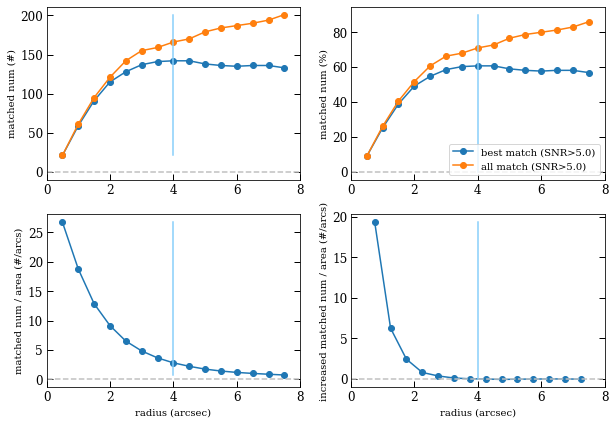

In [7]:
r_start = 0.5
r_end   = 7.5
r_step  = 0.5
radius_arr = np.arange(r_start, r_end+r_step, r_step)

# SNR_thld = 5
fig, axs = plt.subplots(2, 2, figsize=(10,7))
plt.rcParams["font.family"] = "serif"

# SNR_thld_lst = np.arange(3.5, 5+0.5, 0.5)
SNR_thld_lst = [5]
for SNR_thld in SNR_thld_lst:

    num = radius_arr.shape
    best_match_num_arr = np.zeros(num)
    all_match_num_arr = np.zeros(num)
    for i, r in enumerate(radius_arr):
        fn = '%scosmos_match_450um_Gao_Lim_r%.1f_1d4GHzXS.csv'%(PATH_DATA, r)
        df = pd.read_csv(fn)

        df = df.loc[ df['SNR_450']>SNR_thld]
        all_source_num = df.shape[0]

        try:
            match = df.groupby('Count').size()
            match_dict = match.to_dict()

            best_match_num_arr[i] = match_dict[1]
            all_match_num  = 0
            for key, value in match_dict.items():
                all_match_num += key*value
            all_match_num_arr[i] = all_match_num
        except KeyError:
            match_num = df.Separation.notna().sum()
            best_match_num_arr[i] = match_num
            all_match_num_arr[i]  = match_num
            
    plot_diff_radius(fig, axs, all_source_num, radius_arr, best_match_num_arr, all_match_num_arr)
# plt.savefig('%scosmos_Gao_crossmatch_diffR_diffSNR.pdf'%(PATH_FIGURE))
plt.savefig('%scosmos_Gao_crossmatch_diffR_SNR5.pdf'%(PATH_FIGURE))
plt.show()

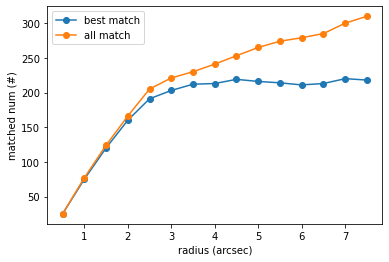

In [164]:
plt.plot(radius_arr, best_match_num_arr, 'o-', label='best match')
plt.plot(radius_arr, all_match_num_arr, 'o-', label='all match')
plt.xlabel('radius (arcsec)')
plt.ylabel('matched num (#)')
plt.legend()

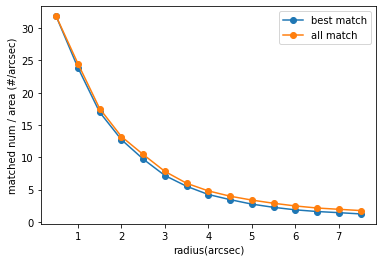

In [165]:
plt.plot(radius_arr, best_match_num_arr/area_arr, 'o-', label='best match')
plt.plot(radius_arr, all_match_num_arr/area_arr, 'o-', label='all match')
plt.xlabel('radius(arcsec)')
plt.ylabel('matched num / area (#/arcsec)')
plt.legend()

In [206]:
# print(all_match_num_arr/area)
# print(interval_arr(all_match_num_arr/area))

NameError: name 'area' is not defined

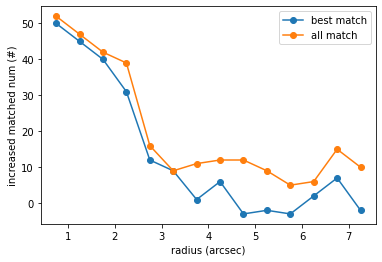

In [211]:
plt.plot(avg_arr(radius_arr), interval_arr(best_match_num_arr), 'o-', label='best match')
plt.plot(avg_arr(radius_arr), interval_arr(all_match_num_arr), 'o-', label='all match')
plt.xlabel('radius (arcsec)')
plt.ylabel('increased matched num (#)')
plt.legend()

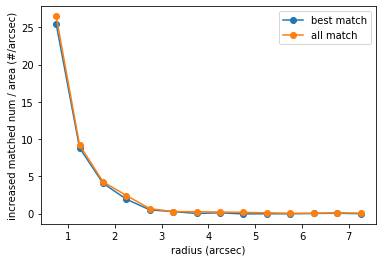

In [210]:
plt.plot(avg_arr(radius_arr), interval_arr(best_match_num_arr)/avg_arr(area_arr), 'o-', label='best match')
plt.plot(avg_arr(radius_arr), interval_arr(all_match_num_arr)/avg_arr(area_arr), 'o-', label='all match')
plt.xlabel('radius (arcsec)')
plt.ylabel('increased matched num / area (#/arcsec)')
plt.legend()

In [27]:
df

,Unnamed: 0,ID_STUDIES_Gao,RA_450Gao,Dec_450Gao,x_450,y_450,S450_raw,S450_corr,S450_err,SNR_450,...,E_Isl_Total_flux_1d4GHz,Isl_rms_1d4GHz,Isl_mean_1d4GHz,Resid_Isl_rms_1d4GHz,Resid_Isl_mean_1d4GHz,S_Code_1d4GHz,Flux_corr_1d4GHz,Eflux_corr_1d4GHz,Separation,Count
0,0,1,150.139038,2.433333,1186,1280,29.612616,28.713087,0.651312,45.466087,...,0.000003,0.000002,-1.066142e-08,1.238999e-06,1.236504e-07,S,0.000075,0.000005,1.689938,1
1,1,2,150.163503,2.372500,1098,1061,30.387997,29.796791,0.861907,35.256707,...,0.000004,0.000002,-4.560107e-08,1.431552e-06,2.103449e-07,S,0.000140,0.000007,0.083049,1
2,2,3,150.098725,2.365555,1331,1036,23.406271,22.817402,0.816971,28.650056,...,0.000003,0.000002,-6.341351e-08,5.207302e-07,-4.922315e-08,S,0.000025,0.000003,0.739934,1
3,3,4,150.143207,2.356111,1171,1002,21.652877,21.316823,0.825594,26.227012,...,0.000005,0.000002,-6.716001e-08,2.109308e-06,1.812759e-06,S,0.000483,0.000007,0.277924,1
4,4,5,150.119853,2.533889,1255,1642,32.558999,31.720827,1.275093,25.534601,...,0.000004,0.000002,-1.973001e-08,1.355152e-06,2.340577e-07,S,0.000082,0.000005,1.790878,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,467,468,150.051744,2.306387,1500,823,5.810075,4.504241,1.658105,3.504046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
468,468,469,150.081204,2.540832,1394,1667,5.804976,4.498744,1.657561,3.502119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
469,469,470,150.095945,2.364722,1341,1033,2.939532,2.464828,0.839514,3.501470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
470,470,471,149.940543,2.310821,1900,839,27.265318,18.495405,7.787254,3.501275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [43]:
df[ df['Count']==1 ]['Count'].count()

160

In [94]:
a = df.groupby('Count').size()

In [95]:
a

Count
0    309
1    160
2      3
dtype: int64

In [103]:
match = df.groupby('Count').size()
match_dict = match.to_dict()

all_match_num  = 0
best_match_num = match_dict[1]
for key, value in match_dict.items():
    all_match_num += key*value

print(all_match_num)
print(best_match_num)

166
160


In [ ]:
def CatalogMatching(cat1, cat2, radius):
    """
    cross match two catalogs
    ----------
    cat1: catalog 1
    cat2: catalog 2
    radius: search radius
    ----------
    Returns
    - matched RA, matched DEC, matched d2d, matched index (based on cat1)
    """
    idx, d2d, _ = cat1.match_to_catalog_sky(cat2)

    ra_arr, dec_arr, d2d_arr, idx_arr = [], [], [], []
    for n in range(len(idx)):
        if d2d[n].value*3600.>=radius:
            ra_arr .append(float('nan'))
            dec_arr.append(float('nan'))
            d2d_arr.append(float('nan'))
            idx_arr.append(float('nan'))
        else:
            ra_arr .append(cat2.ra [idx[n]].value)
            dec_arr.append(cat2.dec[idx[n]].value)
            d2d_arr.append(d2d[n].value*3600.)
            idx_arr.append(int(idx[n]))

    return np.array(ra_arr), np.array(dec_arr), np.array(d2d_arr), np.array(idx_arr)

def PValue_est(d2d, density):
    """
    estimate the corrected-poissonian identification
    ----------
    d2d: the seperation from the nearest sources
    density: source density
    ----------
    Returns
    - p-value
    """
    return 1 - np.exp(-np.pi * (d2d)**2 * (density))